MNIST Dataset Classification using NumPy

Objective:
This script trains a simple softmax-based classifier using NumPy only.
It loads the MNIST dataset from a CSV file, preprocesses the data, and optimizes 
a logistic regression model using mini-batch gradient descent.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:

def load_data(path):
    """Loads and preprocesses the MNIST dataset from a CSV file."""
    data = pd.read_csv(path).values
    np.random.shuffle(data)  # Shuffle dataset to avoid order bias
    X = data[:, 1:] / 255.0  # Normalize pixel values to range [0,1]
    y = data[:, 0]           # Extract labels
    return X, y

def one_hot_encode(y, num_classes=10):
    """Converts class labels to one-hot encoding."""
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

def softmax(z):
    """Computes softmax activation function."""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    """Computes the cross-entropy loss between true labels and predictions."""
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))  # Adding epsilon to avoid log(0)

In [11]:
  def train(X, y, num_classes=10, lr=0.1, epochs=500, batch_size=128):
    """Trains the softmax classifier using mini-batch gradient descent."""
    n_samples, n_features = X.shape
    y_one_hot = one_hot_encode(y, num_classes)
    
    # Initialize weights and biases
    weights = np.random.randn(n_features, num_classes) * 0.01
    biases = np.zeros((1, num_classes))
    
    loss_history = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)  # Shuffle data every epoch
        X, y_one_hot = X[indices], y_one_hot[indices]
        
        for i in range(0, n_samples, batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y_one_hot[i:i+batch_size]
            
            # Forward pass
            logits = np.dot(X_batch, weights) + biases
            y_pred = softmax(logits)
            
            # Compute gradients
            grad_w = np.dot(X_batch.T, (y_pred - y_batch)) / batch_size
            grad_b = np.sum(y_pred - y_batch, axis=0, keepdims=True) / batch_size
            
            # Update parameters
            weights -= lr * grad_w
            biases -= lr * grad_b
        
        loss = cross_entropy_loss(y_one_hot, softmax(np.dot(X, weights) + biases))
        loss_history.append(loss)
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    # Plot loss graph
    plt.plot(range(epochs), loss_history, label="Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Cross-Entropy Loss")
    plt.title("Training Loss over Epochs")
    plt.legend()
    plt.show()
    
    return weights, biases

Epoch 0, Loss: 0.4294
Epoch 50, Loss: 0.2465
Epoch 100, Loss: 0.2337
Epoch 150, Loss: 0.2271
Epoch 200, Loss: 0.2224
Epoch 250, Loss: 0.2187
Epoch 300, Loss: 0.2160
Epoch 350, Loss: 0.2140
Epoch 400, Loss: 0.2118
Epoch 450, Loss: 0.2104


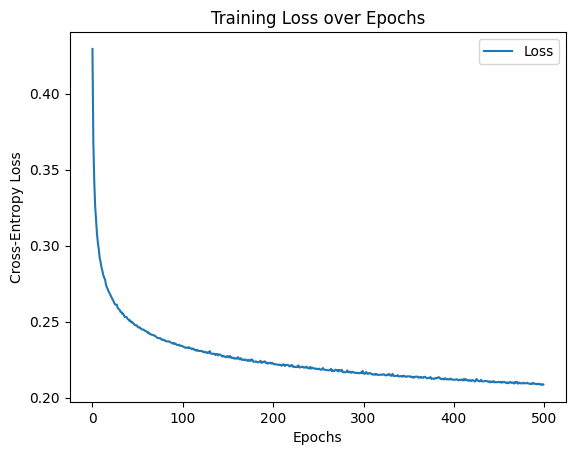

Training Accuracy: 94.13%


In [12]:
   

def predict(X, weights, biases):
    """Predicts class labels for input samples."""
    logits = np.dot(X, weights) + biases
    return np.argmax(softmax(logits), axis=1)

def accuracy(y_true, y_pred):
    """Computes classification accuracy."""
    return np.mean(y_true == y_pred)

if __name__ == "__main__":
    train_path = "/kaggle/input/digit-recognizer/train.csv"
    X, y = load_data(train_path)
    
    # Train model
    weights, biases = train(X, y, lr=0.1, epochs=500, batch_size=128)
    
    # Evaluate model
    y_pred = predict(X, weights, biases)
    print(f"Training Accuracy: {accuracy(y, y_pred) * 100:.2f}%")
